In [33]:
from typing import Dict, TypedDict, List, Optional
from langgraph.graph import StateGraph, START, END

In [34]:
class AgentState(TypedDict):
    number1 : int
    operation : str
    number2 : int
    finalNumber : Optional[int]

In [35]:
def addition(state: AgentState) -> AgentState:
    """ Node to add both number

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    state['finalNumber'] = state['number1'] + state['number2']
    
    return state

def subtraction(state: AgentState) -> AgentState:
    """ Node to subtract both number

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    state['finalNumber'] = state['number1'] - state['number2']
    
    return state

def node_router(state: AgentState) -> AgentState:
    """This node will route the state to the next node

    Args:
        state (AgentState): _description_

    Returns:
        AgentState: _description_
    """
    
    if state['operation'] == "+":
        return "addition_operation"
    
    elif state['operation'] == "-":
        return "subtraction_operation"
    

In [36]:
graph = StateGraph(AgentState)

graph.add_node("add", addition)
graph.add_node("subtract", subtraction)
graph.add_node("router", lambda state: state) # Passthrough function :: state unchanged

graph.add_edge(START, "router")

graph.add_conditional_edges(
    "router",
    node_router,
    {
        # Edge : Node
        "addition_operation" : "add",
        "subtraction_operation" : "subtract"
        
    }
)

graph.add_edge("add", END)
graph.add_edge("subtract", END)

app = graph.compile()

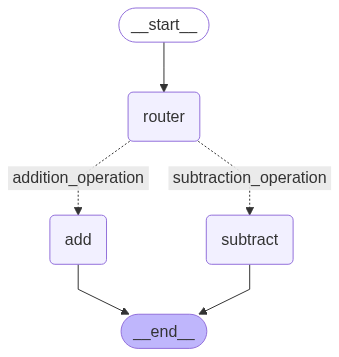

In [37]:
from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))

In [38]:
result = app.invoke({
    "number1" : 10,
    "operation" : "-",
    "number2" : 5,
    "finalNumber" : None
})

print(result['finalNumber'])

5
